In [10]:
#Importing stuff
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [11]:
# Extraction function
def getDF(url):
    response = requests.get(url).json()
    labels = response[0]
    rows = response[1:]
    df = pd.DataFrame(rows, columns=labels)
    return df

# Creating DFs
cs_df = getDF('https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=us:*&NAICS2017=00&key=243f22c29d452d221e30416744e701a2e051eee2')
bc_df = getDF('https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=us:*&QDESC_LABEL=OWNRNUM&NAICS2017=00&key=243f22c29d452d221e30416744e701a2e051eee2')
o_df = getDF('https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=us:*&NAICS2017=00&QDESC_LABEL=USBORN&key=243f22c29d452d221e30416744e701a2e051eee2')
t_df = getDF('https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=us:*&NAICS2017=00&key=243f22c29d452d221e30416744e701a2e051eee2')
ev = getDF('https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=us:*&NAICS2017=00&QDESC_LABEL=*')

<font size='5'>Question:  Does age, sex, or level of education affect the number of veteran owned businesses within these data?</font>

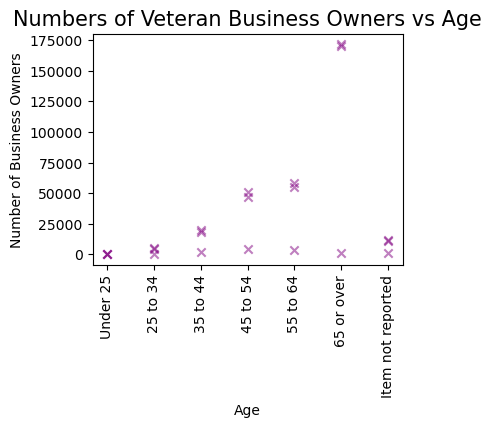

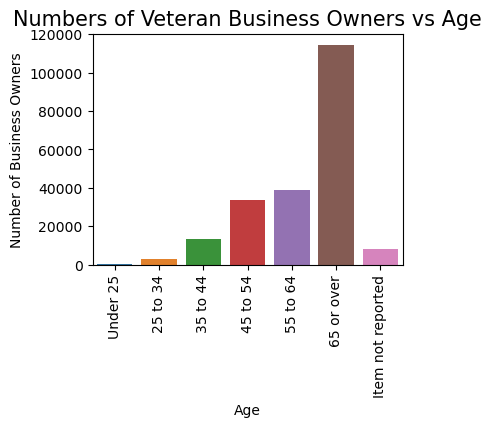

In [13]:
# Veteran Age DF
vet_age = ev.loc[(ev.QDESC_LABEL == 'OWNRAGE')&(ev.OWNER_ETH == '001')&(ev.OWNER_VET != '001')&(ev.OWNER_RACE == '00')]
vet_age = vet_age.loc[(vet_age.OWNCHAR_LABEL != 'Total reporting')]
vet_age = vet_age[['OWNER_VET_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
vet_age['OWNPDEMP'] = vet_age['OWNPDEMP'].astype(int)
veteran_age = vet_age.loc[(vet_age.OWNER_VET_LABEL == 'Veteran')].copy()

# pyplot scatterplot
plt.figure(figsize = (4,3))
plt.scatter(x = veteran_age['OWNCHAR_LABEL'],
            y = veteran_age['OWNPDEMP'],
            marker = 'x',
            alpha = .5,
            color = 'purple')
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Age', size = 15);
plt.xlabel('Age');
plt.ylabel('Number of Business Owners');

# seaborn barplot
sns.set_palette(palette='tab10')
plt.figure(figsize=(4,3))
sns.barplot(x = veteran_age['OWNCHAR_LABEL'], y = veteran_age['OWNPDEMP'], ci=None)
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Age', size = 15);
plt.xlabel('Age');
plt.ylabel('Number of Business Owners');

<font size='5'>Despite the two plots portraying essentially the same message, it's a bit odd that the y-axis isn't the same between the scatter and bar plots. Regardless, the data seems to show a strong relation between age and the number of veteran business owners with the latter increasing as the age brackets increase.</font>

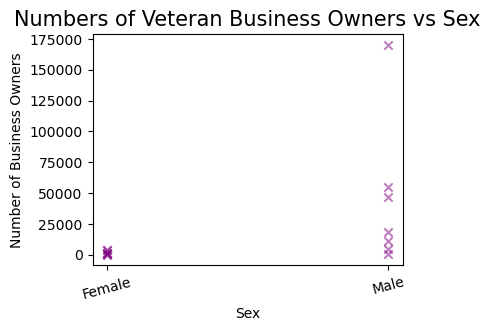

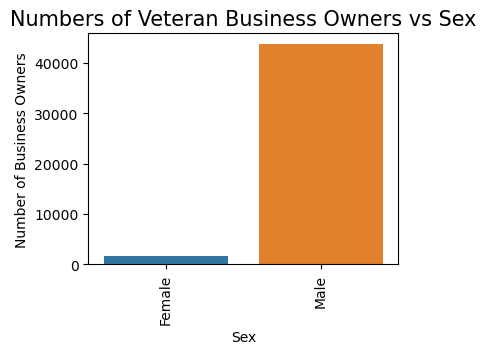

In [14]:
# Veteran Sex DF
vet_sex = ev.loc[(ev.QDESC_LABEL == 'OWNRAGE')&(ev.OWNER_SEX != '001')&(ev.OWNER_ETH == '001')&(ev.OWNER_VET != '001')&(ev.OWNER_RACE == '00')]
vet_sex = vet_sex.loc[(vet_sex.OWNCHAR_LABEL != 'Total reporting')]
vet_sex = vet_sex[['OWNER_VET_LABEL','OWNER_SEX_LABEL','OWNPDEMP']]
vet_sex['OWNPDEMP'] = vet_sex['OWNPDEMP'].astype(int)
veteran_sex = vet_sex.loc[(vet_sex.OWNER_VET_LABEL == 'Veteran')].copy()

# pyplot scatterplot
plt.figure(figsize = (4,3))
plt.scatter(x = veteran_sex['OWNER_SEX_LABEL'],
            y = veteran_sex['OWNPDEMP'],
            marker = 'x',
            alpha = .5,
            color = 'purple')
plt.xticks(rotation = 15)
plt.title('Numbers of Veteran Business Owners vs Sex', size = 15);
plt.xlabel('Sex');
plt.ylabel('Number of Business Owners');

# seaborn barplot
sns.set_palette(palette='tab10')
plt.figure(figsize=(4,3))
sns.barplot(x = veteran_sex['OWNER_SEX_LABEL'], y = veteran_sex['OWNPDEMP'], ci=None)
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Sex', size = 15);
plt.xlabel('Sex');
plt.ylabel('Number of Business Owners');

<font size='5'>The two plots share the same portrayed message despite the y-axis being drastically different as before--weird. There seems to be a massive difference between the numbers of veteran business owners who responded as being male/female--this could be user error during the data extraction or visualization creation.</font>

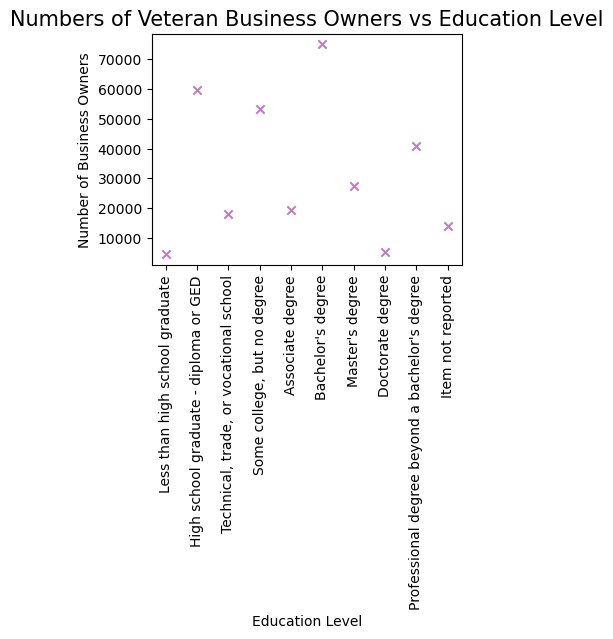

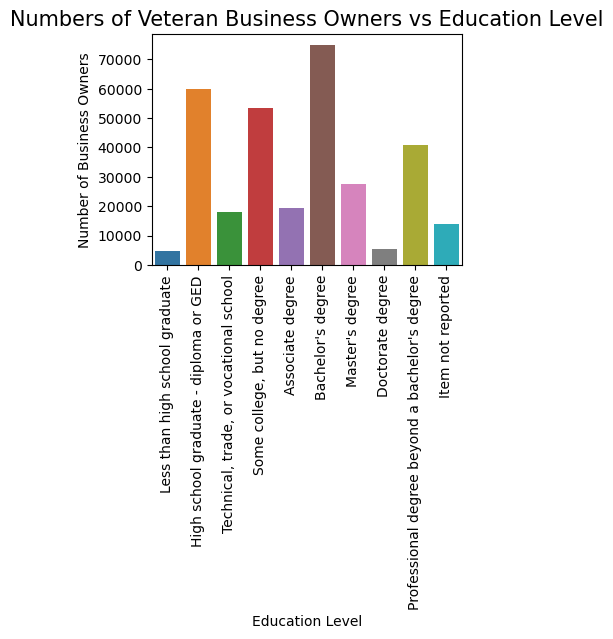

In [15]:
# Veteran Education DF
vet_educ = ev.loc[(ev.QDESC_LABEL == 'EDUC')&(ev.OWNER_SEX == '001')&(ev.OWNER_ETH == '001')&(ev.OWNER_VET != '001')&(ev.OWNER_RACE == '00')]
vet_educ = vet_educ.loc[(vet_educ.OWNCHAR_LABEL != 'Total reporting')]
vet_educ = vet_educ[['OWNER_VET_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
vet_educ['OWNPDEMP'] = vet_educ['OWNPDEMP'].astype(int)
veteran_edu = vet_educ.loc[(vet_educ.OWNER_VET_LABEL == 'Veteran')].copy()

# pyplot scatterplot
plt.figure(figsize = (4,3))
plt.scatter(x = veteran_edu['OWNCHAR_LABEL'],
            y = veteran_edu['OWNPDEMP'],
            marker = 'x',
            alpha = .5,
            color = 'purple')
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Education Level', size = 15);
plt.xlabel('Education Level');
plt.ylabel('Number of Business Owners');

# seaborn barplot
sns.set_palette(palette='tab10')
plt.figure(figsize=(4,3))
sns.barplot(x = veteran_edu['OWNCHAR_LABEL'], y = veteran_edu['OWNPDEMP'])
plt.xticks(rotation = 90)
plt.title('Numbers of Veteran Business Owners vs Education Level', size = 15);
plt.xlabel('Education Level');
plt.ylabel('Number of Business Owners');

<font size='5'>There doesn't seem to be any correlation between education level and the number of veteran business owners, but the y-axes do match up this time.</font>

<font size='5'>Conclusion:  From the initial inspection, there seems to be a strong correlation between the number of veteran business owners and their age/sex. However, education level does not seem to be a major factor in the number of veteran business owners. Further analysis would be needed to see whether this is a trend or one-off, and better data collection/polling/category naming would be beneficial.</font>